In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Training Dataset

In [2]:
data  = pd.read_csv("A:\\Data Sets\\train_data_evaluation_part_2.csv")
data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DATA UNDERSTANDING & CLEANING

In [3]:
data.shape

(82580, 30)

In [4]:
data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.describe(include='object')

,Nationality,DistributionChannel,MarketSegment
count,82580,82580,82580
unique,188,4,7
top,FRA,Travel Agent/Operator,Other
freq,12307,67798,47457


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [8]:
data_cat = data.select_dtypes(include = 'object')
data_cat = data_cat.columns.tolist()
print('Categorical :', data_cat, '\n')

data_num = data.select_dtypes(exclude= 'object')
data_num = data_num.columns.tolist()
print('Numerical :', data_num)

Categorical : ['Nationality', 'DistributionChannel', 'MarketSegment'] 

Numerical : ['Unnamed: 0', 'ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']


In [9]:
for i in data_cat:
  print(f'{i}',data[i].unique(), '\n')

Nationality ['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO' 'BEN' 'ZWE' 'ASM' 'BWA' 'ERI' 'SPM' 'JEY'
 'GNQ' 'MDG' 'GIN' 'NIC' 'SWZ' 'CYM' 'S

In [10]:
for i in data_num:
  print(f'{i}',data[i].unique(), '\n')

Unnamed: 0 [    0     1     2 ... 82577 82578 82579] 

ID [    1     2     3 ... 82578 82579 82580] 

Age [ 51.  nan  31.  60.  54.  49.  32.  42.  25.  27.  58.  56.  57.  68.
  72.  71.  24.  26.  50.  52.  36.  64.  65.  47.  67.  39.  41.  43.
   3.  63.  30.  28.  18.  53.  48.  17.  38.  40.  59.  13.  61.  69.
  55.  70.  34.  66.  82.  35.   6.  62.  45.  37.  29.  10.   8.   7.
   4.  44.   9.  33.   5.  46.  20.  14.  74.  11.  73.   1.  22.  19.
  78.  77.  21.  76.  75.  15.  83.  12.  23.  80.  79.  16.  -7.  81.
 114.  84.  -9.  85.  87. -11.  89.  91.  88.  86. -10.  -6.  -1. 110.
   2.  92. 113.  90.   0. 122.  96. 109.] 

DaysSinceCreation [ 150 1095 1094 ...   14   13   12] 

AverageLeadTime [ 45  61   0  93  58  38  96  60  87  11 109  63   2  95   7  94   1  85
  78  13  67  65  80  98  97  57   6  72  70 103  49  86  41  69  89  59
  99  43  52  68  10  71  81  46  84  55  75  54  50  29  77  40  18  42
  91  28  27  44  23 101   3  56  83  39  66   4  31  12  24 1

In [11]:
# dropping the duplicated rows
print('Data shape :', data.shape)

data.drop_duplicates(inplace = True)
print('Data shape after dropping duplicates :', data.shape)

Data shape : (82580, 30)
Data shape after dropping duplicates : (82580, 30)


In [12]:
#checking null nalues

data.isnull().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [13]:
#calculating null percentage for age column

(data.Age.isnull().sum()/len(data))*100

#There is only 4.5% of null values, so fill with median value of age column

4.5362073141196415

In [14]:
#filling null values
data["Age"].fillna(round(data["Age"].mean(),1), inplace = True)

In [15]:
#checking again null nalues

data.isnull().sum()

Unnamed: 0              0
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [16]:
#considering all the values as 1 which are greater than 1,
data['BookingsCheckedIn'] = [1 if i>1 else i for i in data['BookingsCheckedIn'] ]

In [17]:

for col in data.select_dtypes(include='object'):
    #if data[col].nunique() <=4:
    display(pd.crosstab(data['BookingsCheckedIn'], data[col], normalize='index'))

Nationality,ABW,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,...,UZB,VCT,VEN,VIR,VNM,WLF,WSM,YEM,ZAF,ZWE
BookingsCheckedIn,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.001495,0.000052,0.000103,0.000206,0.000155,0.001495,0.000206,0.000000,0.000052,...,0.000000,0.000052,0.000464,0.000000,0.001031,0.000052,0.000000,0.000052,0.000619,0.000000
1,0.000047,0.002342,0.000032,0.000174,0.000047,0.000411,0.002374,0.000127,0.000047,0.000032,...,0.000032,0.000000,0.000285,0.000016,0.000127,0.000016,0.000016,0.000000,0.000823,0.000016


DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
BookingsCheckedIn,,,,
0,0.011653,0.167578,0.001031,0.819738
1,0.037018,0.133875,0.007723,0.821384


MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
BookingsCheckedIn,,,,,,,
0,0.000206,0.004898,0.009333,0.164226,0.084459,0.619006,0.117872
1,0.003782,0.006156,0.030925,0.128082,0.124442,0.561074,0.145539


In [18]:
# dropping columns which are not required 
data = data.drop(columns = ['Unnamed: 0'])
data = data.drop(columns = ['ID'])
data = data.drop(columns = ['Nationality'])

# Exploratory Data Analysis

In [19]:
data['DistributionChannel'].value_counts()

Travel Agent/Operator      67798
Direct                     11709
Corporate                   2565
Electronic Distribution      508
Name: DistributionChannel, dtype: int64

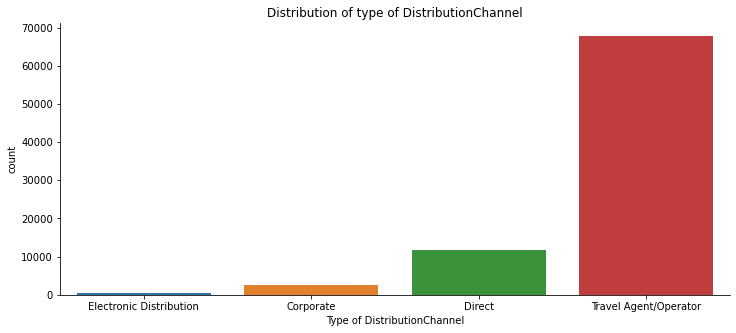

In [20]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'DistributionChannel', data=data,
                order = data['DistributionChannel'].value_counts(ascending = True).index)
plt.xlabel('Type of DistributionChannel')
plt.title(f'Distribution of type of DistributionChannel')
sns.despine()

In [21]:
data['MarketSegment'].value_counts()

Other                    47457
Travel Agent/Operator    11482
Direct                   11278
Groups                    9501
Corporate                 2135
Complementary              484
Aviation                   243
Name: MarketSegment, dtype: int64

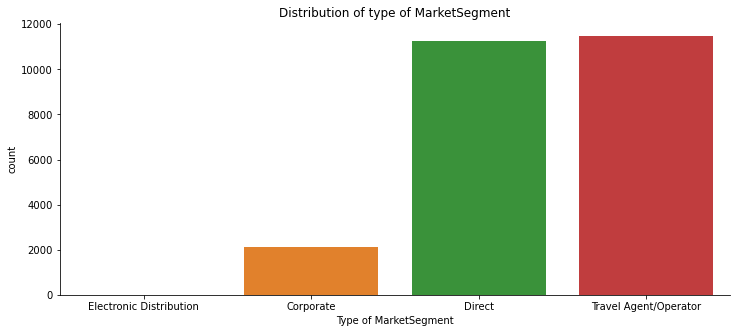

In [22]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'MarketSegment', data=data,
                order = data['DistributionChannel'].value_counts(ascending = True).index)
plt.xlabel('Type of MarketSegment')
plt.title(f'Distribution of type of MarketSegment')
sns.despine()

In [23]:
data.corr()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
Age,1.000000,0.122045,0.246567,0.049517,0.112194,0.004293,0.006297,0.194878,0.108699,0.122475,...,0.007020,-0.017081,0.010611,-0.115343,-0.003033,0.013386,0.012987,0.009425,-0.010680,0.013932
DaysSinceCreation,0.122045,1.000000,0.132253,0.085673,0.153800,0.018090,0.012581,0.415514,0.238082,0.228044,...,0.004831,-0.010994,-0.006291,-0.036748,-0.027906,-0.025316,-0.002045,0.010351,-0.011250,-0.055090
AverageLeadTime,0.246567,0.132253,1.000000,0.213989,0.238732,-0.015530,-0.011905,0.419362,0.349180,0.313593,...,-0.000392,-0.006810,0.008143,-0.039513,-0.014470,0.080111,0.000262,-0.000218,-0.006315,0.008595
LodgingRevenue,0.049517,0.085673,0.213989,1.000000,0.525288,0.070747,0.062404,0.445869,0.651218,0.690811,...,0.005712,0.005081,0.011728,-0.015679,0.014073,0.010036,0.004305,0.012000,-0.000964,0.052264
OtherRevenue,0.112194,0.153800,0.238732,0.525288,1.000000,0.043721,0.034086,0.328504,0.529203,0.477174,...,0.007167,0.009703,0.011356,0.002525,0.013125,0.015287,0.001098,0.011606,0.004913,0.016047
BookingsCanceled,0.004293,0.018090,-0.015530,0.070747,0.043721,1.000000,0.314690,0.016027,0.087124,0.198184,...,0.023356,-0.001617,-0.001269,-0.003471,0.017958,-0.007280,-0.000530,0.004246,-0.000335,-0.006286
BookingsNoShowed,0.006297,0.012581,-0.011905,0.062404,0.034086,0.314690,1.000000,0.011962,0.066664,0.149335,...,-0.000642,-0.001146,-0.000899,-0.002460,0.011400,-0.000660,-0.000376,-0.001288,-0.000238,-0.003834
BookingsCheckedIn,0.194878,0.415514,0.419362,0.445869,0.328504,0.016027,0.011962,1.000000,0.566825,0.575303,...,0.002061,-0.005135,0.000401,-0.057540,-0.015177,-0.030793,0.003073,0.005675,-0.006884,-0.008988
PersonsNights,0.108699,0.238082,0.349180,0.651218,0.529203,0.087124,0.066664,0.566825,1.000000,0.847765,...,0.005826,0.017151,0.013756,-0.011227,0.043089,0.005521,0.000809,0.014386,-0.002094,0.031691
RoomNights,0.122475,0.228044,0.313593,0.690811,0.477174,0.198184,0.149335,0.575303,0.847765,1.000000,...,0.006256,0.017075,0.011510,-0.031799,0.025185,-0.022776,0.000843,0.014260,-0.001782,0.019545


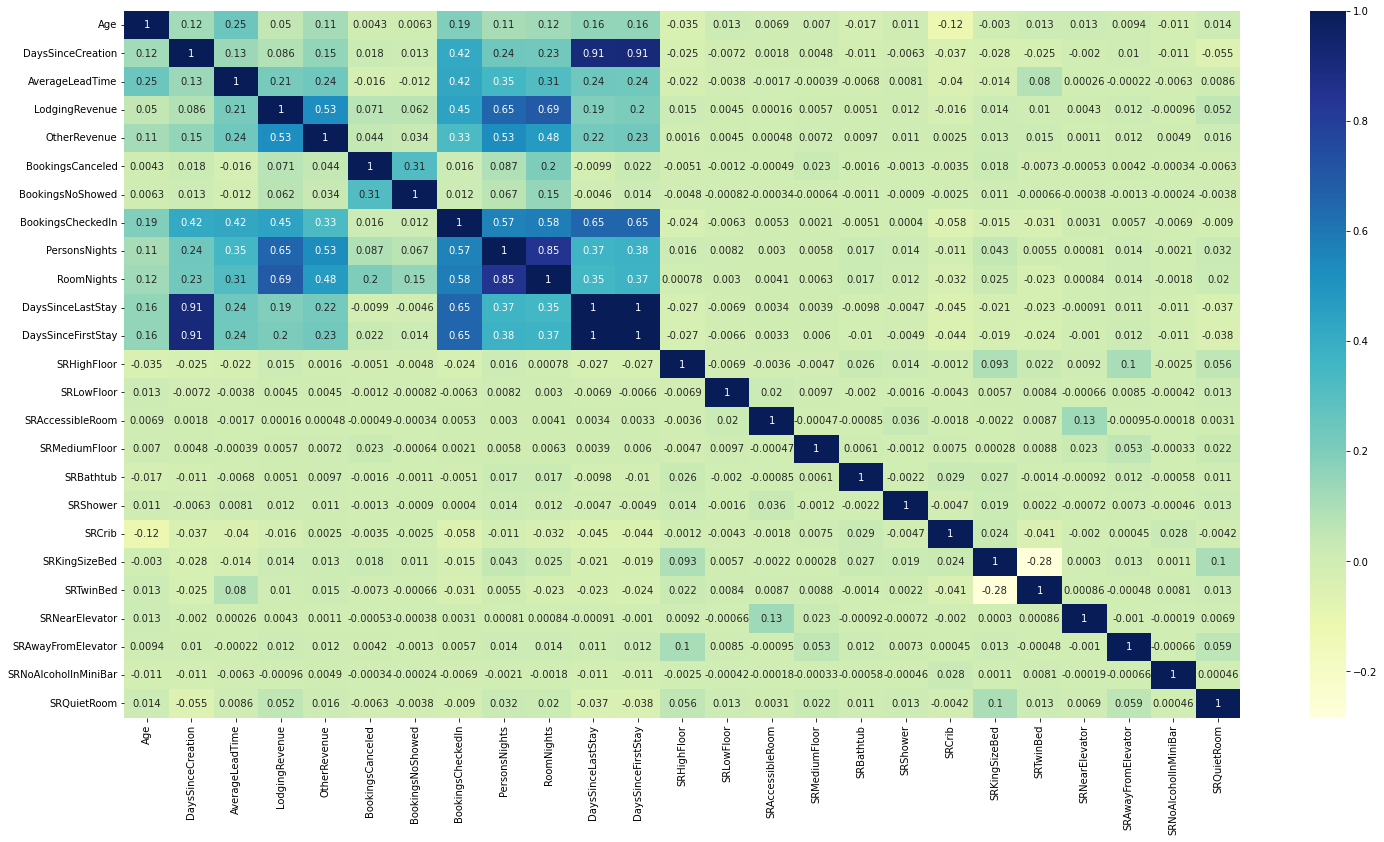

In [24]:
plt.figure(figsize = (25, 13))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

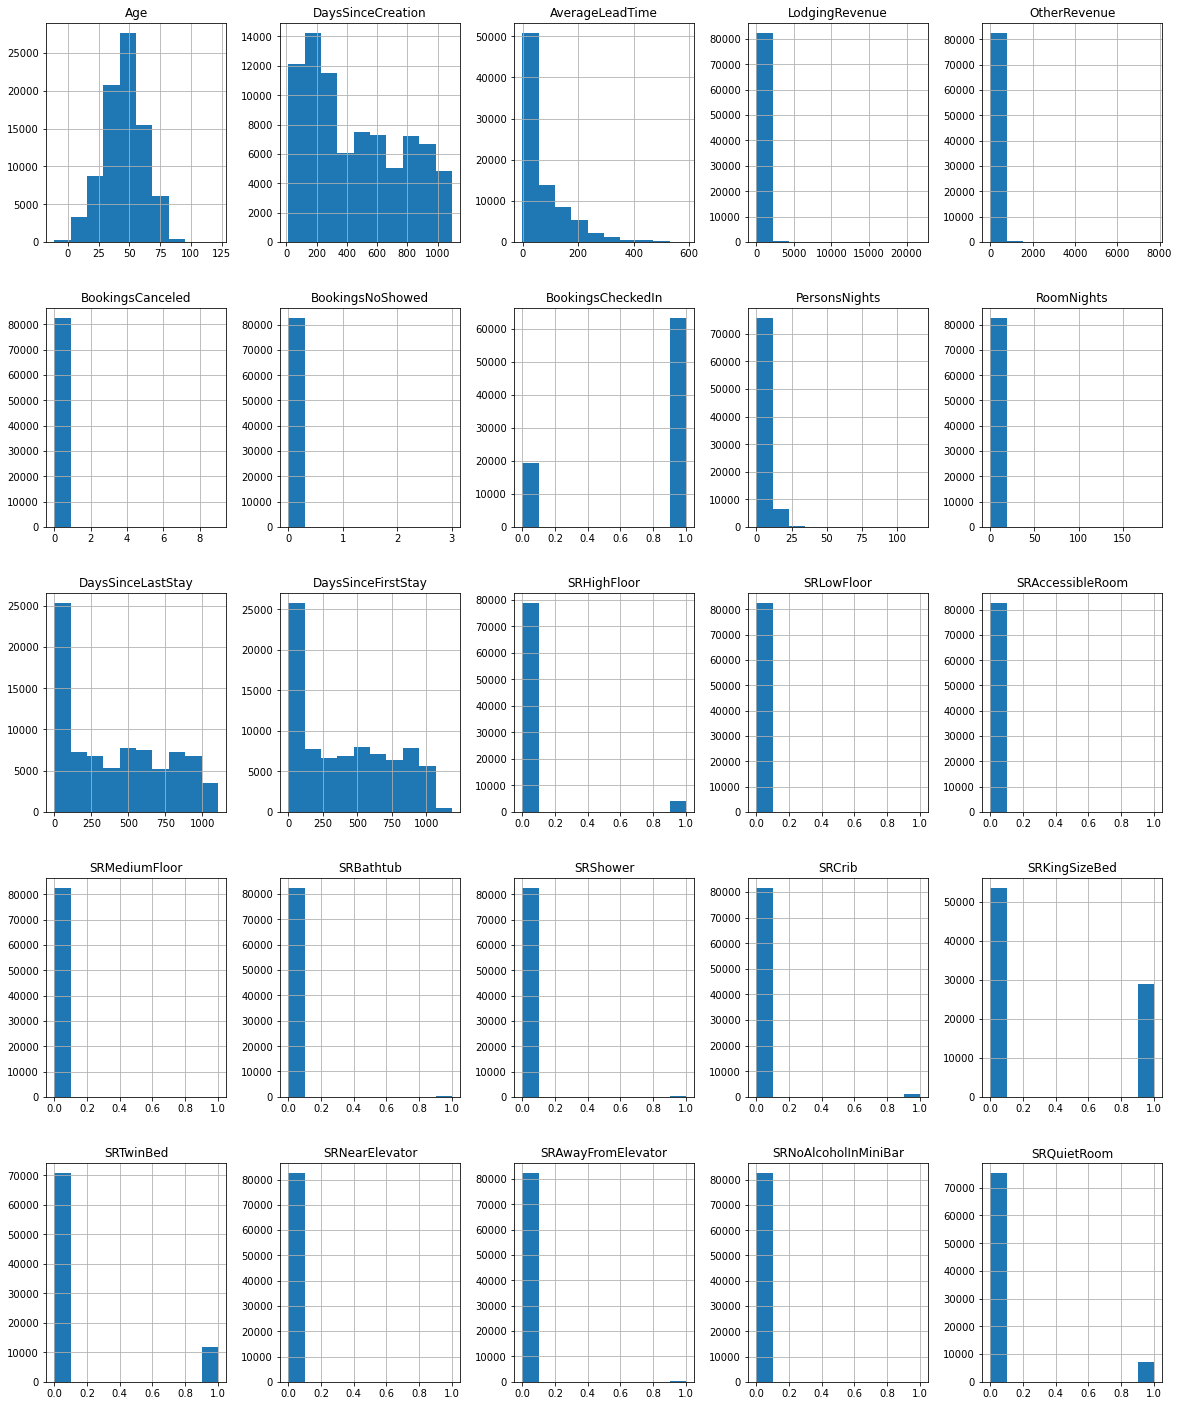

In [25]:
data.hist(figsize=(20,25))
plt.show()

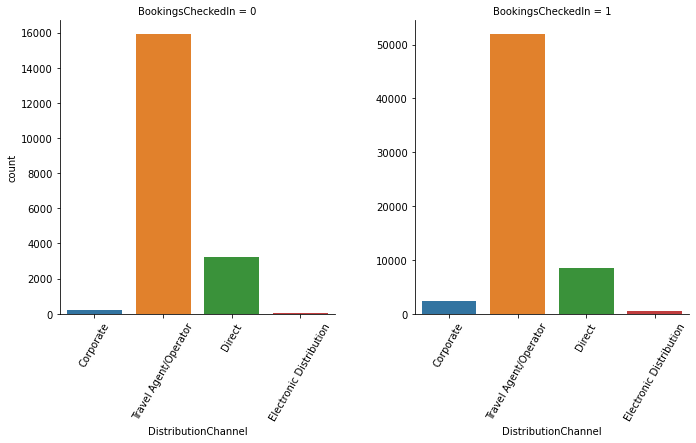

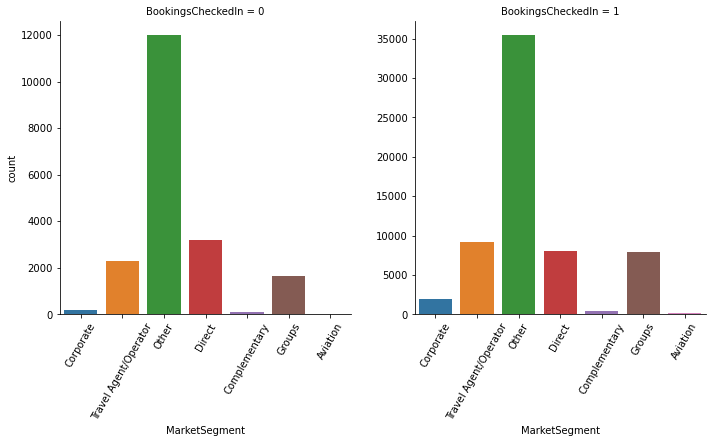

In [26]:
for col in data.select_dtypes(include='object'):
    #if data[col].nunique() <=6:
    g = sns.catplot(x = col, kind='count', col = 'BookingsCheckedIn', data=data, sharey=False)
    g.set_xticklabels(rotation=60)

In [27]:
###########################################

#### Plotting box plots to see outliers

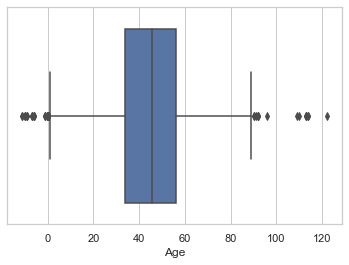

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["Age"])

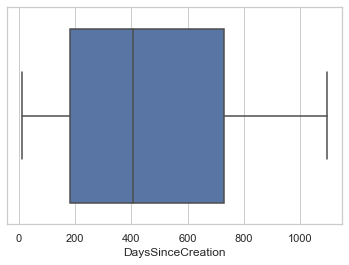

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["DaysSinceCreation"])

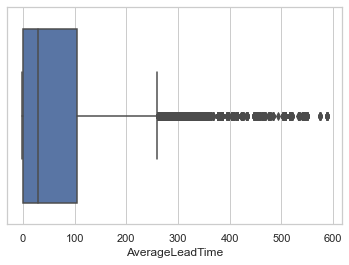

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["AverageLeadTime"])

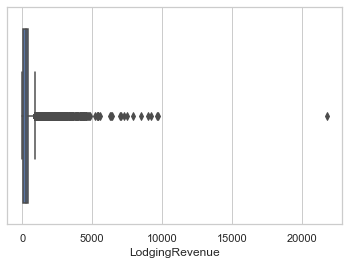

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["LodgingRevenue"])

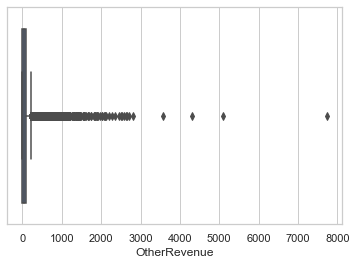

In [32]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["OtherRevenue"])

#### From the above boxplots we can find the outliers

# Handling Outliers

In [33]:
# From the above graphs we found outliers in Age,OtherRevenue, LodgingRevenue and AverageLeadTime columns 
#other than Age column all the columns are affecting to dataset so, we will remove them from dataset

In [34]:
#AverageLeadTime
Q3 = 104
Q1 = 0
IQR = Q3-Q1
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR
data = data[(data["AverageLeadTime"] < max) & (data["AverageLeadTime"] > min)]

In [35]:
#LodgingRevenue
Q3 = 405
Q1 = 0
IQR = Q3-Q1
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR
data = data[(data["LodgingRevenue"] < max) & (data["LodgingRevenue"] > min)]

In [36]:
#OtherRevenue
Q3 =77
Q1 = 0
IQR = Q3-Q1
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR
data = data[(data["OtherRevenue"] < max) & (data["OtherRevenue"] > min)]

### Boxplots after removing outliers

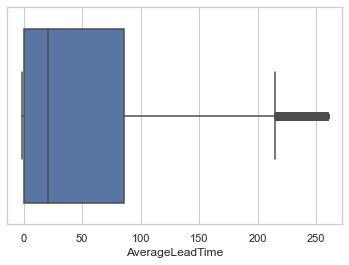

In [37]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["AverageLeadTime"])

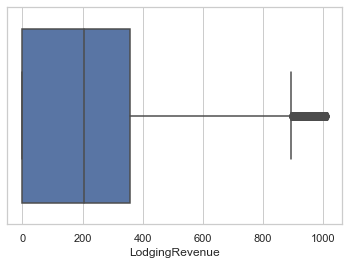

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["LodgingRevenue"])

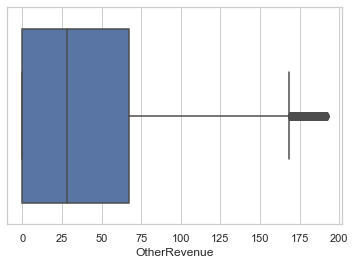

In [39]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data["OtherRevenue"])

# Encoding (one Hot Encoding)

In [40]:
data_cat = data.select_dtypes(include = 'object')
data_cat = data_cat.columns.tolist()
print('Categorical :', data_cat, '\n')

Categorical : ['DistributionChannel', 'MarketSegment'] 



In [41]:
dummies1 = pd.get_dummies(data["DistributionChannel"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('DistributionChannel',axis=1)

In [42]:
dummies1 = pd.get_dummies(data["MarketSegment"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('MarketSegment',axis=1)

In [43]:
#after encoding
data.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
0,51.0,150,45,371.0,105.3,1,0,1,8,5,...,0,0,0,0,0,1,0,0,0,0
1,45.5,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,1,0,0,0,0,0,0,1
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,1,0,0,0,0,0,0,1
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [44]:
data.shape

(71888, 36)

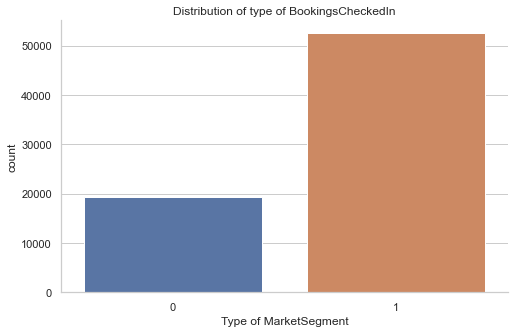

In [137]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'BookingsCheckedIn', data=data,
                order = data['BookingsCheckedIn'].value_counts(ascending = True).index)
plt.xlabel('Type of MarketSegment')
plt.title(f'Distribution of type of BookingsCheckedIn')
sns.despine()

In [46]:
data['BookingsCheckedIn'].value_counts()

1    52494
0    19394
Name: BookingsCheckedIn, dtype: int64

#### From the above, we conclude that the data is imbalaced data set, so we have balace it and feed to Ml models

# Balancing the DATASET

In [48]:
!pip install imblearn 

In [49]:
data.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Corporate', 'Direct',
       'Electronic Distribution', 'Travel Agent/Operator', 'Aviation',
       'Complementary', 'Corporate', 'Direct', 'Groups', 'Other',
       'Travel Agent/Operator'],
      dtype='object')

In [50]:
data.shape

(71888, 36)

In [51]:
X = data[['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue', 'BookingsCanceled','BookingsNoShowed','PersonsNights', 'RoomNights', 'DaysSinceLastStay','DaysSinceFirstStay','SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom','Corporate','Direct','Electronic Distribution','Travel Agent/Operator','Aviation','Complementary','Corporate','Direct','Groups','Other','Travel Agent/Operator']].values
y = data[["BookingsCheckedIn"]].values

In [52]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [116]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train) # find mean and standard deviation

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# Synthetic Minority - Oversampling

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [55]:
X_sm.shape, y_sm.shape

((78534, 41), (78534,))

## Oversampling followed by Undersampling

In [56]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN()
X_sn, y_sn = smt.fit_resample(X_train, y_train)

In [57]:
X_sn.shape, y_sn.shape

((78296, 41), (78296,))

In [58]:
X_sn = pd.DataFrame(X_sn)
y_sn = pd.DataFrame(y_sn)

# ML Models

## Logistic Regression

### SMOTE

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score

def LR(X, y):
  logistic = LogisticRegression()
  logistic.fit(X, y)

  y_pred = logistic.predict(X_test)
  print('Accuracy :', logistic.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

  

LR(X_sm, y_sm)

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


### SMOTEENN

In [60]:
LR(X_sn, y_sn)

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


## KNN Classifier

### SMOTE

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

K = []

for i in [1,2,3,4,5,6,7,8,9,10,15,20,30]: # looping to find best K
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_sm,y_sm) # training the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, X_sm, y_sm, cv = 5)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

,K Value,Cross_val_Score
0,1,0.99890
2,3,0.99817
1,2,0.99798
4,5,0.99747
3,4,0.99736


In [62]:
def KNN(K, w, p):
  knn = KNeighborsClassifier(n_neighbors = K, weights = w, p = p)
  knn.fit(X_sm,y_sm)

  y_pred = knn.predict(X_test)

  print(w.upper(), f'at p = {p}:')
  print('Accuracy :', knn.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


KNN(1, 'distance', 1)

DISTANCE at p = 1:
Accuracy : 0.999 
f1-score : 0.999 
AUROC : 0.999


In [63]:
KNN(1, 'distance', 2)

DISTANCE at p = 2:
Accuracy : 0.998 
f1-score : 0.999 
AUROC : 0.998


In [64]:
KNN(1, 'uniform', 2)

UNIFORM at p = 2:
Accuracy : 0.998 
f1-score : 0.999 
AUROC : 0.998


### SMOTEENN

In [65]:
K = []

for i in [1,2,3,4,5,6,7,8,9,10,15,20,30]: # looping to find best K
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_sn,y_sn) # training the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, X_sm, y_sm, cv = 5)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

,K Value,Cross_val_Score
0,1,0.99890
2,3,0.99817
1,2,0.99798
4,5,0.99747
3,4,0.99736


In [66]:
def KNN(K,w,p):
  knn = KNeighborsClassifier(n_neighbors=K, weights=w, p=p)
  knn.fit(X_sm,y_sm)

  y_pred = knn.predict(X_test)

  print(w.upper(), f'at p = {p}:')
  print('Accuracy :', knn.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

  

KNN(1, 'distance', 1)

DISTANCE at p = 1:
Accuracy : 0.999 
f1-score : 0.999 
AUROC : 0.999


In [67]:
KNN(1,'distance', 2)

DISTANCE at p = 2:
Accuracy : 0.998 
f1-score : 0.999 
AUROC : 0.998


In [68]:
KNN(1, 'uniform', 1)

UNIFORM at p = 1:
Accuracy : 0.999 
f1-score : 0.999 
AUROC : 0.999


## Decision Tree Classifier

### SMOTE

In [69]:
from sklearn.tree import DecisionTreeClassifier

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_sm, y_sm)
  valAccuracy = cross_val_score(dt, X_sm, y_sm, cv=10)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

,Depth,Cross_val_Score
0,1,1.0
1,2,1.0
3,4,1.0
4,5,1.0
6,7,1.0


In [70]:
def DT(i):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_sm,y_sm)

  y_pred = dt.predict(X_test)

  print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

  

DT(2)

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


### SMOTEENN

In [71]:
from sklearn.tree import DecisionTreeClassifier

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_sn, y_sn)
  valAccuracy = cross_val_score(dt, X_sm, y_sm, cv=10)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

,Depth,Cross_val_Score
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
5,6,1.0


In [72]:
def DT(i):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_sm,y_sm)

  y_pred = dt.predict(X_test)

  print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


DT(3)

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


## Random Forest Classifier

### SMOTE

In [73]:
from sklearn.ensemble import RandomForestClassifier

depth = int(np.log(10)/np.log(2)) # log2(number of features)

rf = RandomForestClassifier(max_depth= depth, max_features = 'sqrt')
rf.fit(X_sm, y_sm)

y_pred = rf.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


### SMOTEENN

In [75]:
depth = int(np.log(10)/np.log(2)) # log2(number of features)

rf = RandomForestClassifier(max_depth= depth, max_features = 'sqrt')
rf.fit(X_sn, y_sn)

y_pred = rf.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))



C:\Users\Brinda\AppData\Local\Temp\ipykernel_15348\2731960525.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_sn, y_sn)


Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


## XG BOOST

In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### SMOTE

In [77]:
import xgboost as xgb

XG = []

for lr in [0.01,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGB = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XGB.fit(X_sm,y_sm) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(XGB, X_sm, y_sm, cv=10)).round(4))

Learning rate :  0.01  Cross-Val score :  1.0
Learning rate :  0.05  Cross-Val score :  1.0
Learning rate :  0.1  Cross-Val score :  1.0
Learning rate :  0.11  Cross-Val score :  1.0
Learning rate :  0.12  Cross-Val score :  1.0
Learning rate :  0.13  Cross-Val score :  1.0
Learning rate :  0.14  Cross-Val score :  1.0
Learning rate :  0.15  Cross-Val score :  1.0
Learning rate :  0.2  Cross-Val score :  1.0
Learning rate :  0.5  Cross-Val score :  1.0
Learning rate :  0.7  Cross-Val score :  1.0
Learning rate :  1  Cross-Val score :  1.0


In [78]:
XGB = xgb.XGBClassifier(learning_rate = 1, n_estimators=100)
XGB.fit(X_sm,y_sm) #train the model

X_test = pd.DataFrame(X_test)
y_pred = XGB.predict(X_test)

print('Accuracy :', XGB.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


### SMOTEENN

In [79]:
for lr in [0.01,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGB = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XGB.fit(X_sn,y_sn) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(XGB, X_sn, y_sn, cv=10)).round(4))

Learning rate :  0.01  Cross-Val score :  1.0
Learning rate :  0.05  Cross-Val score :  1.0
Learning rate :  0.1  Cross-Val score :  1.0
Learning rate :  0.11  Cross-Val score :  1.0
Learning rate :  0.12  Cross-Val score :  1.0
Learning rate :  0.13  Cross-Val score :  1.0
Learning rate :  0.14  Cross-Val score :  1.0
Learning rate :  0.15  Cross-Val score :  1.0
Learning rate :  0.2  Cross-Val score :  1.0
Learning rate :  0.5  Cross-Val score :  1.0
Learning rate :  0.7  Cross-Val score :  1.0
Learning rate :  1  Cross-Val score :  1.0


In [80]:
XGB = xgb.XGBClassifier(learning_rate = 1, n_estimators=100)
XGB.fit(X_sm,y_sm) #train the model

X_test = pd.DataFrame(X_test)
y_pred = XGB.predict(X_test)

print('Accuracy :', XGB.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


#### We have fed our training dataset to all the supervised ML algorithms, except KNN Classifier all the other models performed well


# ######################################################################

# Importing Test Dataset

In [119]:
df  = pd.read_csv("A:\\Data Sets\\test_data_evaluation_part2.csv")
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# DATA CLEANING

In [120]:
df.shape

(1000, 30)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Nationality           1000 non-null   object 
 3   Age                   967 non-null    float64
 4   DaysSinceCreation     1000 non-null   int64  
 5   AverageLeadTime       1000 non-null   int64  
 6   LodgingRevenue        1000 non-null   float64
 7   OtherRevenue          1000 non-null   float64
 8   BookingsCanceled      1000 non-null   int64  
 9   BookingsNoShowed      1000 non-null   int64  
 10  BookingsCheckedIn     1000 non-null   int64  
 11  PersonsNights         1000 non-null   int64  
 12  RoomNights            1000 non-null   int64  
 13  DaysSinceLastStay     1000 non-null   int64  
 14  DaysSinceFirstStay    1000 non-null   int64  
 15  DistributionChannel   

In [122]:
df.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [123]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

In [124]:
#calculating null percentage for age column

df.Age.isnull().sum()/len(df)*100

#There is only 4.5% of null values, so fill with median value of age column

3.3000000000000003

In [125]:
#filling null values
df["Age"].fillna(round(df["Age"].mean(),1), inplace = True)

In [126]:
# dropping the duplicated rows
print('Data shape :', df.shape)

df.drop_duplicates(inplace = True)
print('Data shape after dropping duplicates :', df.shape)

Data shape : (1000, 30)
Data shape after dropping duplicates : (1000, 30)


In [127]:
#considering all the values as 1 which are greater than 1,
df['BookingsCheckedIn'] = [1 if i>1 else i for i in df['BookingsCheckedIn'] ]

In [130]:
# dropping columns which are not required 
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['ID'])
df = df.drop(columns = ['Nationality'])

# Encoding (one Hot Encoding)

In [131]:
dummies1 = pd.get_dummies(df["DistributionChannel"])
df= pd.concat([df,dummies1], axis=1)
df = df.drop('DistributionChannel',axis=1)

In [134]:
dummies1 = pd.get_dummies(df["MarketSegment"])
df = pd.concat([df,dummies1], axis=1)
df = df.drop('MarketSegment',axis=1)

In [ ]:
#################################################################################################################################

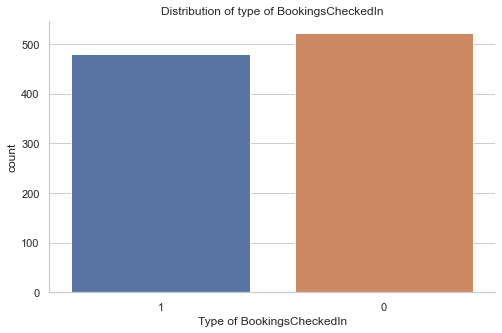

In [138]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'BookingsCheckedIn', data=df,
                order = df['BookingsCheckedIn'].value_counts(ascending = True).index)
plt.xlabel('Type of BookingsCheckedIn')
plt.title(f'Distribution of type of BookingsCheckedIn')
sns.despine()

#### The distribution of 1 and 0 are almost equal so there is no need to balance dataset

# ML Models

In [139]:
X = df[['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue', 'BookingsCanceled','BookingsNoShowed','PersonsNights', 'RoomNights', 'DaysSinceLastStay','DaysSinceFirstStay','SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom','Corporate','Direct','Electronic Distribution','Travel Agent/Operator','Aviation','Complementary','Corporate','Direct','Other','Travel Agent/Operator']].values
y = df[["BookingsCheckedIn"]].values

In [140]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [141]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train) # find mean and standard deviation

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score


logistic = LogisticRegression()
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)
print('Accuracy :', logistic.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN Classification

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


K = []

for i in [1,2,3,4,5,6,7,8,9,10,15,20,30]: # looping to find best K
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_train,y_train) # training the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, X_sm, y_sm, cv = 5)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

,K Value,Cross_val_Score
0,1,0.99882
2,3,0.99801
1,2,0.99791
4,5,0.99749
3,4,0.99722


In [148]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)


print('Accuracy :', knn.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 0.976 
f1-score : 0.976 
AUROC : 0.976


## Decison Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train,y_train)
  valAccuracy = cross_val_score(dt, X_sm, y_sm, cv=10)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

,Depth,Cross_val_Score
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [152]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


## Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

depth = int(np.log(10)/np.log(2)) # log2(number of features)

rf = RandomForestClassifier(max_depth= depth, max_features = 'sqrt')
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))


C:\Users\Brinda\AppData\Local\Temp\ipykernel_15348\1679684722.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0


## XG BOOST

In [155]:
import xgboost as xgb

XG = []

for lr in [0.01,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGB = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XGB.fit(X_train,y_train) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(XGB, X_sm, y_sm, cv=10)).round(4))

Learning rate :  0.01  Cross-Val score :  1.0
Learning rate :  0.05  Cross-Val score :  1.0
Learning rate :  0.1  Cross-Val score :  1.0
Learning rate :  0.11  Cross-Val score :  1.0
Learning rate :  0.12  Cross-Val score :  1.0
Learning rate :  0.13  Cross-Val score :  1.0
Learning rate :  0.14  Cross-Val score :  1.0
Learning rate :  0.15  Cross-Val score :  1.0
Learning rate :  0.2  Cross-Val score :  1.0
Learning rate :  0.5  Cross-Val score :  1.0
Learning rate :  0.7  Cross-Val score :  1.0
Learning rate :  1  Cross-Val score :  1.0


In [156]:
XGB = xgb.XGBClassifier(learning_rate = 1, n_estimators=100)
XGB.fit(X_train,y_train) #train the model

X_test = pd.DataFrame(X_test)
y_pred = XGB.predict(X_test)

print('Accuracy :', XGB.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 1.0 
f1-score : 1.0 
AUROC : 1.0
